## Decision trees with the UCI Adult dataset 

### The "Adult" dataset

#### Dataset description:

UCI Adult: classify people using demographical data - whether they earn more than \$50,000 per year or not.

Dataset is in `data` folder

Feature descriptions:

- **Age** – continuous feature
- **Workclass** –  continuous feature
- **fnlwgt** – final weight of object, continuous feature
- **Education** –  categorical feature
- **Education_Num** – number of years of education, continuous feature
- **Martial_Status** –  categorical feature
- **Occupation** –  categorical feature
- **Relationship** – categorical feature
- **Race** – categorical feature
- **Sex** – categorical feature
- **Capital_Gain** – continuous feature
- **Capital_Loss** – continuous feature
- **Hours_per_week** – continuous feature
- **Country** – categorical feature

**Categorical Attributes**

workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
Individual work category

education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. Individual's highest education degree

marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. Individual marital status

occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

Individual's occupation

relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. Individual's relation in a family

race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. Race of Individual

sex: Female, Male.

native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
Individual's native country

**Continuous Attributes**

age: continuous. Age of an individual

fnlwgt: final weight, continuous. The weights on the CPS files are controlled to independent estimates of the civilian noninstitutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau.

capital-gain: continuous.

capital-loss: continuous.

hours-per-week: continuous.

Individual's working hour per week

**Target** – earnings level, categorical (binary) feature.

#### 1. Reading train and test data

In [64]:
import pandas as pd
import numpy as np

In [65]:
data_test = pd.read_csv('./data/adult_test.csv', sep=';')
data_train = pd.read_csv('./data/adult_train.csv', sep=';')

In [66]:
data_train.head()

,Age,Workclass,fnlwgt,Education,Education_Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [67]:
# necessary to remove rows with incorrect labels in test dataset
data_test = data_test[(data_test['Target'] == ' >50K.') | (data_test['Target']==' <=50K.')]

#### 2. Enconde
Encode target as
```
<=50K ---> 0

>50K -----> 1
```

In [77]:
data_train['Target'].value_counts()

0    24720
1     7841
Name: Target, dtype: int64

In [75]:
data_test.replace(' <=50K.', 0, inplace=True)
data_test.replace(' >50K.', 1, inplace=True)

data_train.replace(' <=50K', 0, inplace=True)
data_train.replace(' >50K', 1, inplace=True)

In [76]:
data_test.head()

,Age,Workclass,fnlwgt,Education,Education_Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,0
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,0
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,1
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,1
5,18,NaN,103497.0,Some-college,10.0,Never-married,NaN,Own-child,White,Female,0.0,0.0,30.0,United-States,0


#### 3. Primary data analysis
1. Get a description in one unique table of all features and target of train
2. Get the value counts of target
3. Plot a grid of histograms of all columns (categorical included).

In [80]:
data_train.describe(include='all')

,Age,Workclass,fnlwgt,Education,Education_Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target
count,32561.000000,30725,3.256100e+04,32561,32561.000000,32561,30718,32561,32561,32561,32561.000000,32561.000000,32561.000000,31978,32561.000000
unique,NaN,8,NaN,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,NaN
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,NaN
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,NaN
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,0.240810
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,0.427581
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,0.000000
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,0.000000
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,0.000000
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,0.000000


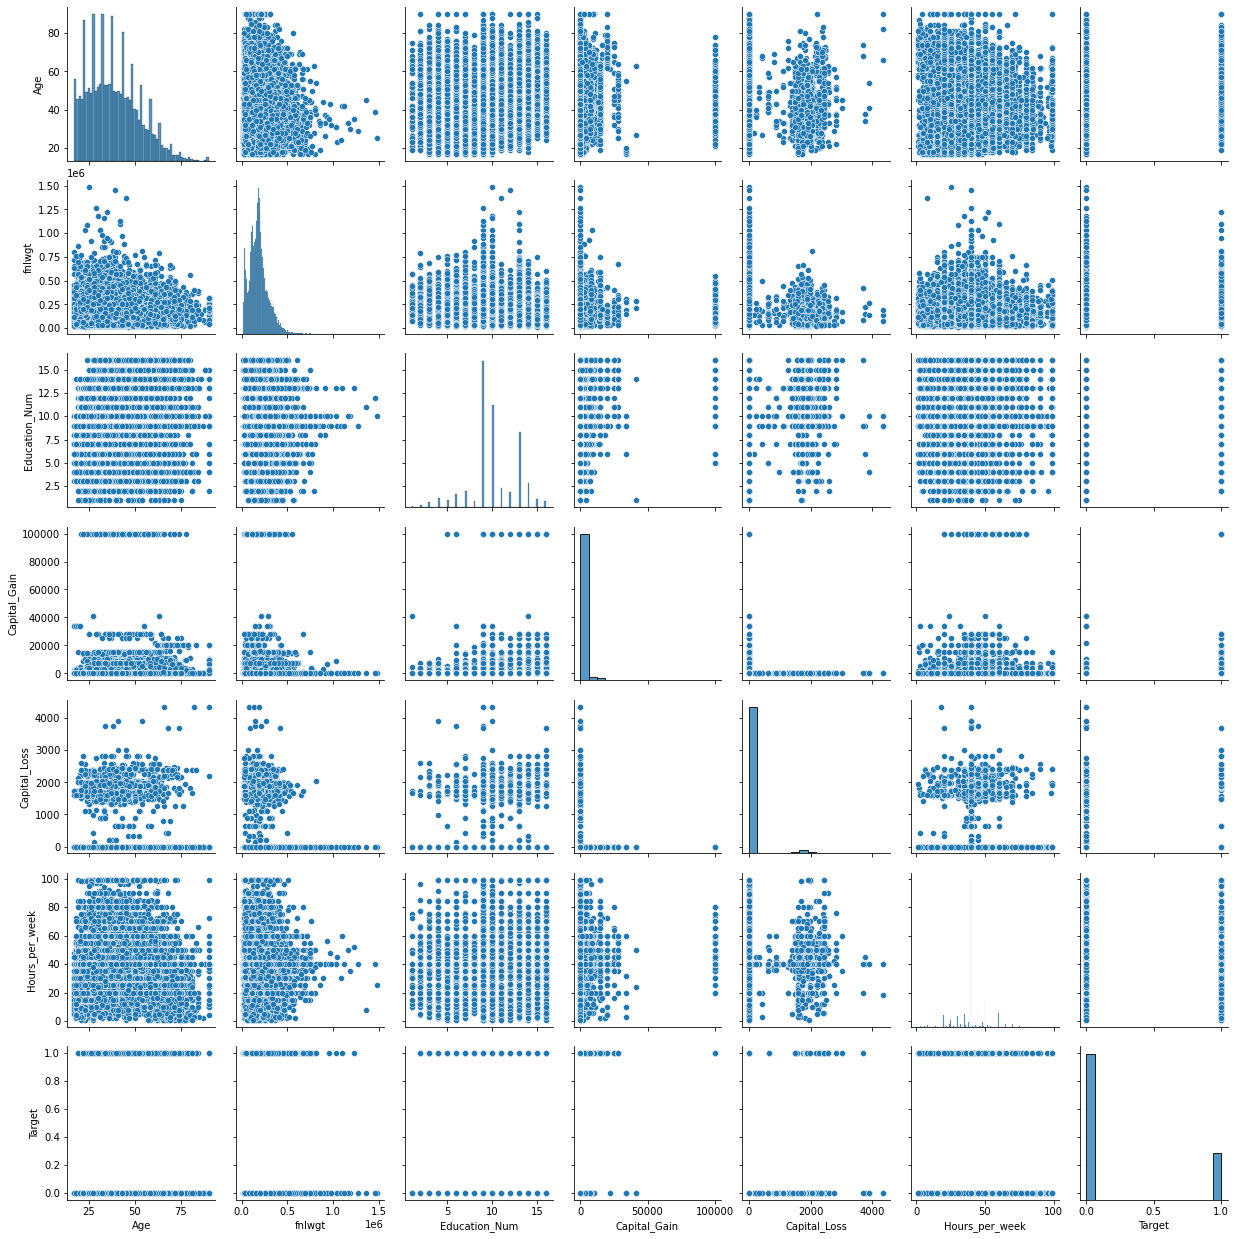

In [99]:
import seaborn as sns
sns.pairplot(data_train, palette='deep')

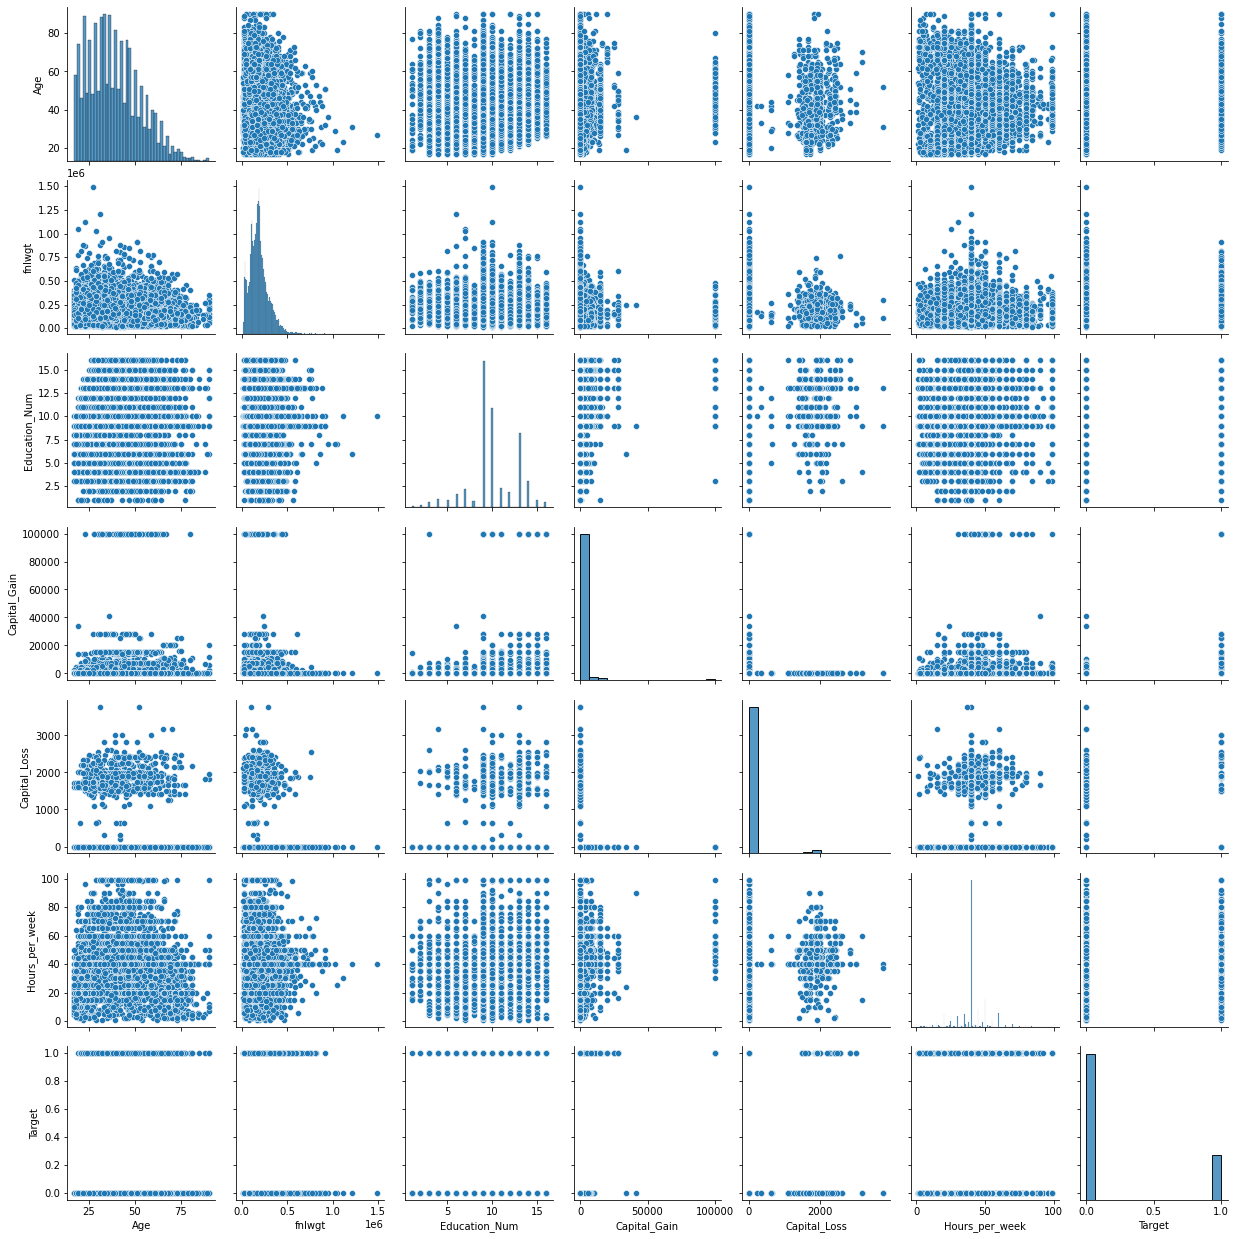

In [100]:
sns.pairplot(data_test, palette='deep')

#### 4. Checking data types
1. Check the types of train and test. ¿Any difference?
2. There is an int feature in train, that is considered as object in test. Solve it
3. Cast all numeric types to the numeric types of the train

In [89]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16281 entries, 1 to 16281
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             16281 non-null  int32  
 1   Workclass       15318 non-null  object 
 2   fnlwgt          16281 non-null  float64
 3   Education       16281 non-null  object 
 4   Education_Num   16281 non-null  float64
 5   Martial_Status  16281 non-null  object 
 6   Occupation      15315 non-null  object 
 7   Relationship    16281 non-null  object 
 8   Race            16281 non-null  object 
 9   Sex             16281 non-null  object 
 10  Capital_Gain    16281 non-null  float64
 11  Capital_Loss    16281 non-null  float64
 12  Hours_per_week  16281 non-null  float64
 13  Country         16007 non-null  object 
 14  Target          16281 non-null  int64  
dtypes: float64(5), int32(1), int64(1), object(8)
memory usage: 1.9+ MB


In [90]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   Workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education_Num   32561 non-null  int64 
 5   Martial_Status  32561 non-null  object
 6   Occupation      30718 non-null  object
 7   Relationship    32561 non-null  object
 8   Race            32561 non-null  object
 9   Sex             32561 non-null  object
 10  Capital_Gain    32561 non-null  int64 
 11  Capital_Loss    32561 non-null  int64 
 12  Hours_per_week  32561 non-null  int64 
 13  Country         31978 non-null  object
 14  Target          32561 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 3.7+ MB


In [88]:
data_test['Age'] = data_test['Age'].astype('int')

In [94]:
for c in data_train.columns:
    tipo = str(data_train[c].dtype)
    data_test[c] = data_test[c].astype(tipo)

In [95]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16281 entries, 1 to 16281
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             16281 non-null  int64 
 1   Workclass       15318 non-null  object
 2   fnlwgt          16281 non-null  int64 
 3   Education       16281 non-null  object
 4   Education_Num   16281 non-null  int64 
 5   Martial_Status  16281 non-null  object
 6   Occupation      15315 non-null  object
 7   Relationship    16281 non-null  object
 8   Race            16281 non-null  object
 9   Sex             16281 non-null  object
 10  Capital_Gain    16281 non-null  int64 
 11  Capital_Loss    16281 non-null  int64 
 12  Hours_per_week  16281 non-null  int64 
 13  Country         16007 non-null  object
 14  Target          16281 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 2.0+ MB


#### 5. Missing data
1. Fill in missing data for continuous features with their median values
2. Fill in missing data for categorical features with their mode.

In [97]:
data_train.isnull().sum()

Age                  0
Workclass         1836
fnlwgt               0
Education            0
Education_Num        0
Martial_Status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_Gain         0
Capital_Loss         0
Hours_per_week       0
Country            583
Target               0
dtype: int64

In [98]:
data_test.isnull().sum()

Age                 0
Workclass         963
fnlwgt              0
Education           0
Education_Num       0
Martial_Status      0
Occupation        966
Relationship        0
Race                0
Sex                 0
Capital_Gain        0
Capital_Loss        0
Hours_per_week      0
Country           274
Target              0
dtype: int64

In [106]:
data_train['Workclass'].mode()

0     Private
dtype: object

In [116]:
moda = str(data_train['Workclass'].mode())
data_train['Workclass'].fillna(moda, inplace=True)
data_test['Workclass'].fillna(moda, inplace=True)

In [118]:
moda = str(data_train['Occupation'].mode())
data_train['Occupation'].fillna(moda, inplace=True)
data_test['Occupation'].fillna(moda, inplace=True)

In [119]:
moda = str(data_train['Country'].mode())
data_train['Country'].fillna(moda, inplace=True)
data_test['Country'].fillna(moda, inplace=True)

In [120]:
data_test.isnull().sum()

Age               0
Workclass         0
fnlwgt            0
Education         0
Education_Num     0
Martial_Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_Gain      0
Capital_Loss      0
Hours_per_week    0
Country           0
Target            0
dtype: int64

In [121]:
data_train.isnull().sum()

Age               0
Workclass         0
fnlwgt            0
Education         0
Education_Num     0
Martial_Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_Gain      0
Capital_Loss      0
Hours_per_week    0
Country           0
Target            0
dtype: int64

#### 6. Encodig categorical
Enconde with dummies all the categorical features

We'll dummy code some categorical features: **Workclass**, **Education**, **Martial_Status**, **Occupation**, **Relationship**, **Race**, **Sex**, **Country**. It can be done via pandas method **get_dummies**

In [124]:
data_train2 = pd.get_dummies(data_train)

In [125]:
data_train2.columns

Index(['Age', 'fnlwgt', 'Education_Num', 'Capital_Gain', 'Capital_Loss',
       'Hours_per_week', 'Target', 'Workclass_ Federal-gov',
       'Workclass_ Local-gov', 'Workclass_ Never-worked',
       ...
       'Country_ Puerto-Rico', 'Country_ Scotland', 'Country_ South',
       'Country_ Taiwan', 'Country_ Thailand', 'Country_ Trinadad&Tobago',
       'Country_ United-States', 'Country_ Vietnam', 'Country_ Yugoslavia',
       'Country_0     United-States\ndtype: object'],
      dtype='object', length=109)

#### 7. Check for any inconsistency in the columns of train and test

In [126]:
data_test2 = pd.get_dummies(data_test)

In [127]:
data_test2.columns

Index(['Age', 'fnlwgt', 'Education_Num', 'Capital_Gain', 'Capital_Loss',
       'Hours_per_week', 'Target', 'Workclass_ Federal-gov',
       'Workclass_ Local-gov', 'Workclass_ Never-worked',
       ...
       'Country_ Puerto-Rico', 'Country_ Scotland', 'Country_ South',
       'Country_ Taiwan', 'Country_ Thailand', 'Country_ Trinadad&Tobago',
       'Country_ United-States', 'Country_ Vietnam', 'Country_ Yugoslavia',
       'Country_0     United-States\ndtype: object'],
      dtype='object', length=108)

In [134]:
[ c for c in data_test2.columns if c not in data_train2.columns]

[]

In [135]:
[ c for c in data_train2.columns if c not in data_test2.columns]

['Country_ Holand-Netherlands']

In [136]:
data_test2['Country_ Holand-Netherlands'] = 0

#### 8. Divide train and test in features and target

In [138]:
features = list(data_train2.columns)
features.remove('Target')

target = 'Target'

# Train
X_train, y_train = data_train2[features], data_train2[target]

# Test
X_test, y_test = data_test2[features], data_test2[target]

#### 9. Decision tree

Train a decision tree **(DecisionTreeClassifier)** with a maximum depth of 3, and evaluate the accuracy metric on the test data. Use parameter **random_state = 17** for results reproducibility.

In [158]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=50,random_state=17)

In [159]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=50, random_state=17)

Make a prediction with the trained model on the test data.

In [160]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))


0.9999692884125181
0.8106381671887476


#### 10. Check the documentation on DecissionTreeClassifier and tune the hyperparameters in order to get better predictions
Hyperparameters that you can tune: splitter, max_depth, min_samples_split, min_samples_leaf, max_features...